## Project 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
train_data.columns

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [4]:
train_data

Id Prediction  DER_mass_MMC  DER_mass_transverse_met_lep  \
0       100000          s       138.470                       51.655   
1       100001          b       160.937                       68.768   
2       100002          b      -999.000                      162.172   
3       100003          b       143.905                       81.417   
4       100004          b       175.864                       16.915   
...        ...        ...           ...                          ...   
249995  349995          b      -999.000                       71.989   
249996  349996          b      -999.000                       58.179   
249997  349997          s       105.457                       60.526   
249998  349998          b        94.951                       19.362   
249999  349999          b      -999.000                       72.756   

        DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
0             97.827    27.980                  0.91           124.711   
1            103.235    48.146               -999.00          -999.000   
2            125.953    35.635               -999.00          -999.000   
3             80.943     0.414               -999.00          -999.000   
4            134.805    16.405               -999.00          -999.000   
...              ...       ...                   ...               ...   
249995        36.548     5.042               -999.00          -999.000   
249996        68.083    22.439               -999.00          -999.000   
249997        75.839    39.757               -999.00          -999.000   
249998        68.812    13.504               -999.00          -999.000   
249999        70.831     7.479               -999.00          -999.000   

        DER_prodeta_jet_jet  DER_deltar_tau_lep  ...  PRI_met_phi  \
0                     2.666               3.064  ...       -0.277   
1                  -999.000               3.473  ...       -1.916   
2                  -999.000               3.148  ...       -2.186   
3                  -999.000               3.310  ...        0.060   
4                  -999.000               3.891  ...       -0.871   
...                     ...                 ...  ...          ...   
249995             -999.000               1.392  ...        2.859   
249996             -999.000               2.585  ...       -0.867   
249997             -999.000               2.390  ...       -2.890   
249998             -999.000               3.365  ...        0.811   
249999             -999.000               2.025  ...       -1.596   

        PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0             258.733            2              67.435                2.150   
1             164.546            1              46.226                0.725   
2             260.414            1              44.251                2.053   
3              86.062            0            -999.000             -999.000   
4              53.131            0            -999.000             -999.000   
...               ...          ...                 ...                  ...   
249995        144.665            0            -999.000             -999.000   
249996         80.408            0            -999.000             -999.000   
249997        198.907            1              41.992                1.800   
249998        112.718            0            -999.000             -999.000   
249999         99.405            0            -999.000             -999.000   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                     0.444                 46.062                    1.24   
1                     1.158               -999.000                 -999.00   
2                    -2.028               -999.000                 -999.00   
3                  -999.000               -999.000                 -999.00   
4                  -999.000               -999.000                 -999.00   
...         

In [5]:
train_data.iloc[:, 1].value_counts()

b    164333
s     85667
Name: Prediction, dtype: int64

## Split data between der and pri

In [6]:
columns_der = list(filter(lambda x : x.startswith("DER") or x == "Id" or x == "Prediction", list(train_data.columns)))

In [7]:
columns_pri = list(filter(lambda x : x.startswith("PRI") or x == "Id" or x == "Prediction", list(train_data.columns)))

In [8]:
train_data_der = train_data[columns_der]
train_data_pri = train_data[columns_pri]

# Processing for der

In [9]:
train_data_der

Id Prediction  DER_mass_MMC  DER_mass_transverse_met_lep  \
0       100000          s       138.470                       51.655   
1       100001          b       160.937                       68.768   
2       100002          b      -999.000                      162.172   
3       100003          b       143.905                       81.417   
4       100004          b       175.864                       16.915   
...        ...        ...           ...                          ...   
249995  349995          b      -999.000                       71.989   
249996  349996          b      -999.000                       58.179   
249997  349997          s       105.457                       60.526   
249998  349998          b        94.951                       19.362   
249999  349999          b      -999.000                       72.756   

        DER_mass_vis  DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
0             97.827    27.980                  0.91           124.711   
1            103.235    48.146               -999.00          -999.000   
2            125.953    35.635               -999.00          -999.000   
3             80.943     0.414               -999.00          -999.000   
4            134.805    16.405               -999.00          -999.000   
...              ...       ...                   ...               ...   
249995        36.548     5.042               -999.00          -999.000   
249996        68.083    22.439               -999.00          -999.000   
249997        75.839    39.757               -999.00          -999.000   
249998        68.812    13.504               -999.00          -999.000   
249999        70.831     7.479               -999.00          -999.000   

        DER_prodeta_jet_jet  DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  \
0                     2.666               3.064      41.928     197.760   
1                  -999.000               3.473       2.078     125.157   
2                  -999.000               3.148       9.336     197.814   
3                  -999.000               3.310       0.414      75.968   
4                  -999.000               3.891      16.405      57.983   
...                     ...                 ...         ...         ...   
249995             -999.000               1.392       5.042      55.892   
249996             -999.000               2.585      22.439      50.618   
249997             -999.000               2.390      22.183     120.462   
249998             -999.000               3.365      13.504      55.859   
249999             -999.000               2.025       7.479      83.240   

        DER_pt_ratio_lep_tau  DER_met_phi_centrality  DER_lep_eta_centrality  
0                      1.582                   1.396                     0.2  
1                      0.879                   1.414                  -999.0  
2                      3.776                   1.414                  -999.0  
3                      2.354                  -1.285                  -999.0  
4                      1.056                  -1.385                  -999.0  
...                      ...                     ...                     ...  
249995                 1.258                  -1.414                  -999.0  
249996                 1.162                  -1.345                  -999.0  
249997                 1.202                   0.529                  -999.0  
249998                 0.999                   1.414                  -999.0  
249999                 0.936                  -1.411                  -999.0  

[250000 rows x 15 columns]

## Correlation processing

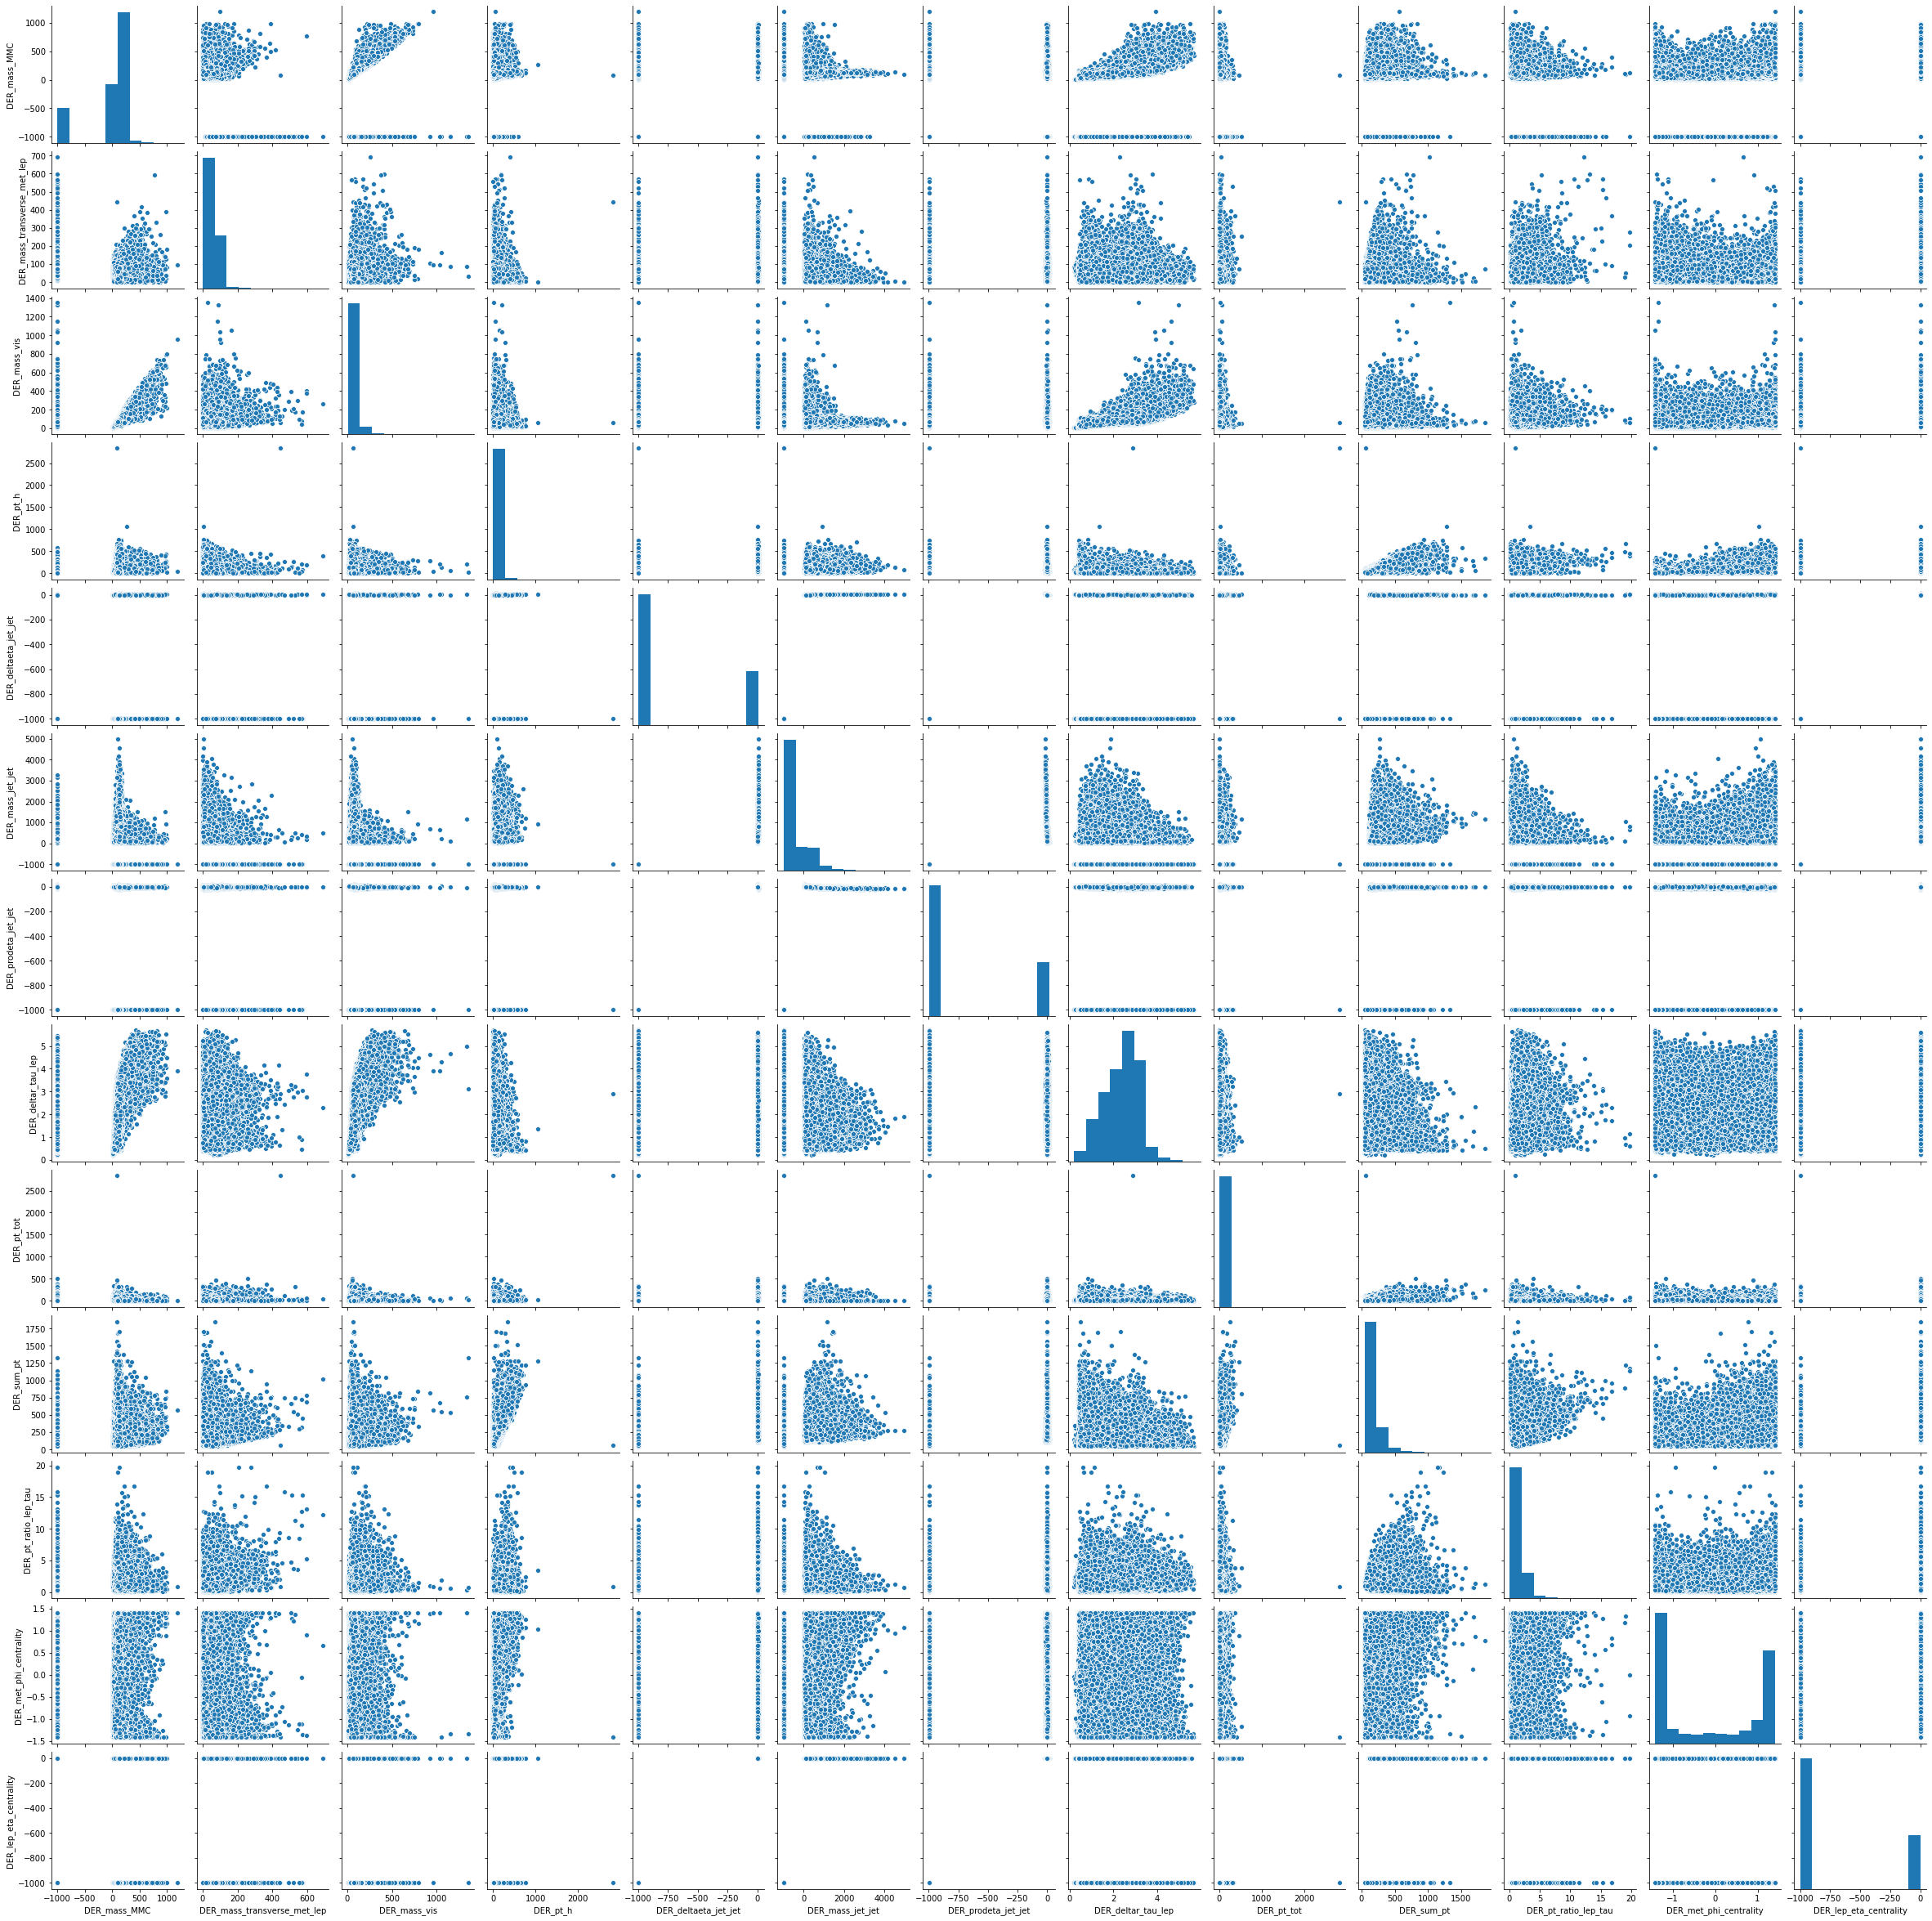

In [10]:
g = sns.pairplot(train_data_der.iloc[:,2:])
plt.show()

<AxesSubplot:>

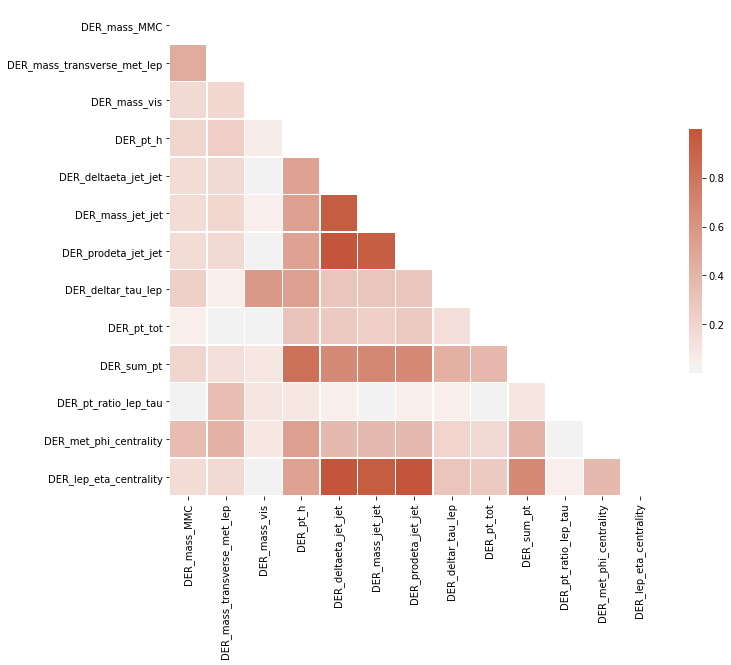

In [11]:
corr = train_data_der.iloc[:, 2:].corr().abs()

# Generate a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
corr[corr > 0.9].count()

DER_mass_MMC                   1
DER_mass_transverse_met_lep    1
DER_mass_vis                   1
DER_pt_h                       1
DER_deltaeta_jet_jet           4
DER_mass_jet_jet               4
DER_prodeta_jet_jet            4
DER_deltar_tau_lep             1
DER_pt_tot                     1
DER_sum_pt                     1
DER_pt_ratio_lep_tau           1
DER_met_phi_centrality         1
DER_lep_eta_centrality         4
dtype: int64

In [13]:
columns_to_be_dropped = ["DER_deltaeta_jet_jet", "DER_mass_jet_jet", "DER_prodeta_jet_jet", "DER_lep_eta_centrality"]

In [14]:
for c in columns_to_be_dropped:
    train_data_der2 = train_data_der.drop([c], axis = 1)
    train_data_der2.to_csv("../data/der_with" + c + "dropped")

# Processing for pri

In [15]:
train_data_pri

Id Prediction  PRI_tau_pt  PRI_tau_eta  PRI_tau_phi  PRI_lep_pt  \
0       100000          s      32.638        1.017        0.381      51.626   
1       100001          b      42.014        2.039       -3.011      36.918   
2       100002          b      32.154       -0.705       -2.093     121.409   
3       100003          b      22.647       -1.655        0.010      53.321   
4       100004          b      28.209       -2.197       -2.231      29.774   
...        ...        ...         ...          ...          ...         ...   
249995  349995          b      24.754       -0.414       -0.905      31.137   
249996  349996          b      23.416       -1.609        2.776      27.202   
249997  349997          s      35.636       -0.266       -3.132      42.834   
249998  349998          b      27.944       -2.211        2.792      27.915   
249999  349999          b      43.003        1.685        2.653      40.236   

        PRI_lep_eta  PRI_lep_phi  PRI_met  PRI_met_phi  PRI_met_sumet  \
0             2.273       -2.414   16.824       -0.277        258.733   
1             0.501        0.103   44.704       -1.916        164.546   
2            -0.953        1.052   54.283       -2.186        260.414   
3            -0.522       -3.100   31.082        0.060         86.062   
4             0.798        1.569    2.723       -0.871         53.131   
...             ...          ...      ...          ...            ...   
249995       -0.950        0.380   46.520        2.859        144.665   
249996        0.308        1.042   46.737       -0.867         80.408   
249997        0.381        0.851   23.419       -2.890        198.907   
249998       -0.874       -0.296   12.150        0.811        112.718   
249999        1.490        0.637   40.729       -1.596         99.405   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0                 2              67.435                2.150   
1                 1              46.226                0.725   
2                 1              44.251                2.053   
3                 0            -999.000             -999.000   
4                 0            -999.000             -999.000   
...             ...                 ...                  ...   
249995            0            -999.000             -999.000   
249996            0            -999.000             -999.000   
249997            1              41.992                1.800   
249998            0            -999.000             -999.000   
249999            0            -999.000             -999.000   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                     0.444                 46.062                    1.24   
1                     1.158               -999.000                 -999.00   
2                    -2.028               -999.000                 -999.00   
3                  -999.000               -999.000                 -999.00   
4                  -999.000               -999.000                 -999.00   
...                     ...                    ...                     ...   
249995             -999.000               -999.000                 -999.00   
249996             -999.000               -999.000                 -999.00   
249997               -0.166               -999.000                 -999.00   
249998             -999.000               -999.000                 -999.00   
249999             -999.000               -999.000                 -999.00   

        PRI_jet_subleading_phi  PRI_jet_all_pt  
0                       -2.475         113.497  
1                     -999.000          46.226  
2                     -999.000          44.251  
3                     -999.000           0.000  
4                     -999.000           0.000  
...                        ...             ...  
249995                -999.000           0.000  
249996                -999.000           0.000  
249997                -999.000         

## Correlation processing

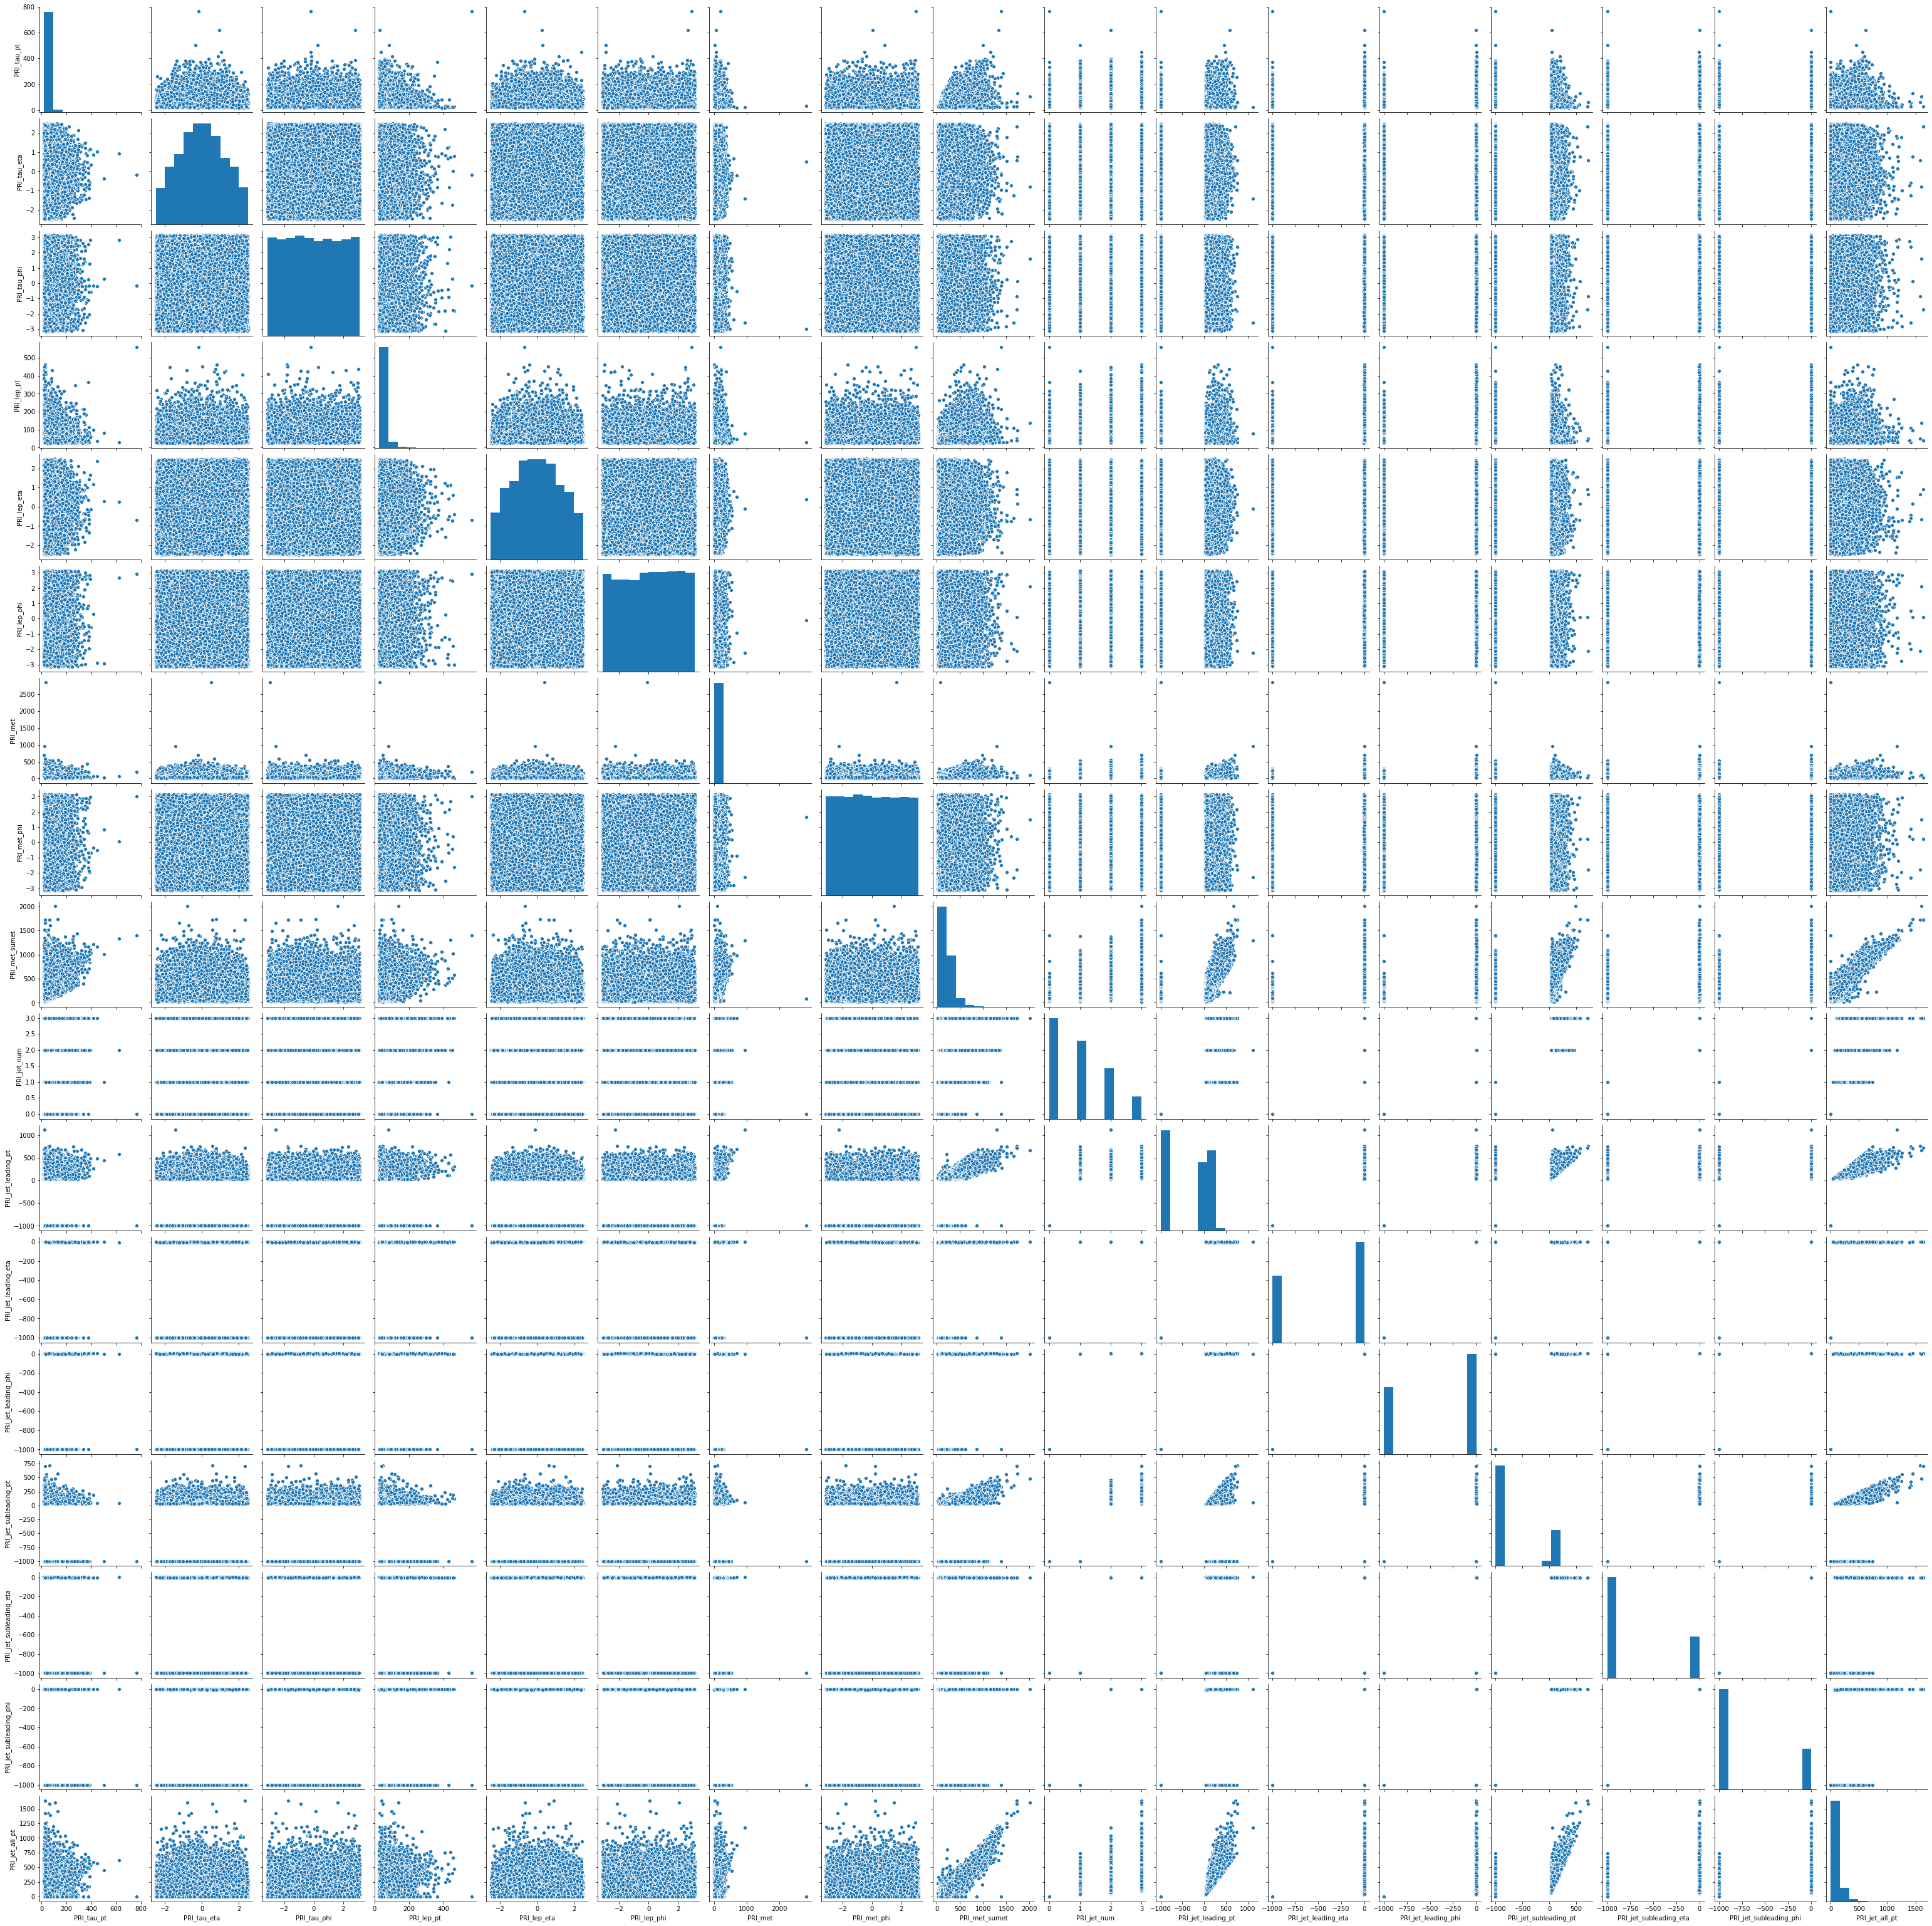

In [16]:
g = sns.pairplot(train_data_pri.iloc[:,2:])
plt.show()

<AxesSubplot:>

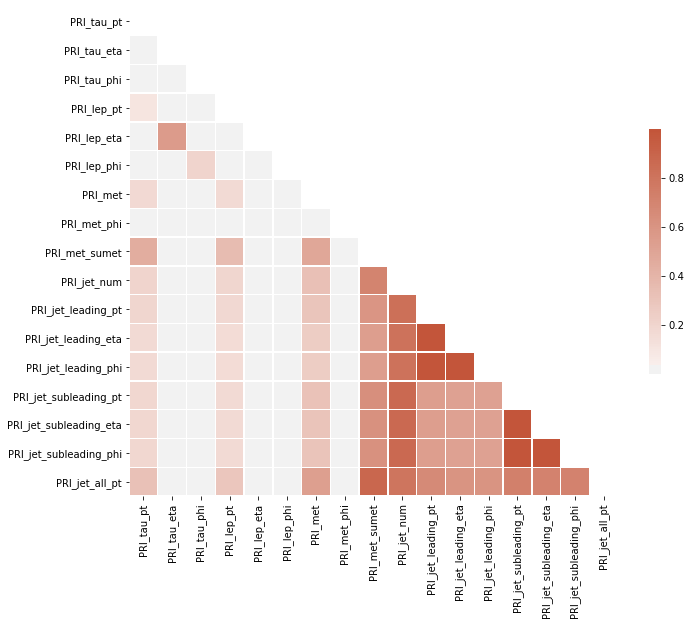

In [17]:
corr = train_data_pri.iloc[:, 2:].corr().abs()

# Generate a mask for the upper triangle

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
corr[corr > 0.8].count()

PRI_tau_pt                1
PRI_tau_eta               1
PRI_tau_phi               1
PRI_lep_pt                1
PRI_lep_eta               1
PRI_lep_phi               1
PRI_met                   1
PRI_met_phi               1
PRI_met_sumet             2
PRI_jet_num               8
PRI_jet_leading_pt        4
PRI_jet_leading_eta       4
PRI_jet_leading_phi       4
PRI_jet_subleading_pt     4
PRI_jet_subleading_eta    4
PRI_jet_subleading_phi    4
PRI_jet_all_pt            3
dtype: int64

In [19]:
columns_to_be_dropped = ["PRI_met_sumet", "PRI_jet_num", "PRI_jet_leading_pt", "PRI_jet_leading_eta", "PRI_jet_leading_phi", "PRI_jet_subleading_pt", "PRI_jet_subleading_eta", "PRI_jet_subleading_phi", "PRI_jet_all_pt"]

In [20]:
for c in columns_to_be_dropped:
    train_data_pri2 = train_data_pri.drop([c], axis = 1)
    train_data_pri2.to_csv("../data/pri_with" + c + "dropped")

# Result comparison

In [37]:
import os
import sys
sys.path.append('./../src/')
from implementations import *
from utils import *
from pipeline import * 
from proj1_helpers import * 

In [34]:
train_data_der2.join(train_data_pri2, on="Id", rsuffix="_right").drop(["Id_right", "Prediction_right"], axis = 1).columns

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi'],
      dtype='object')

In [56]:
def pipeline(y, tX):
    
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(tX, y, random_state = 1)
    X_train, X_test = preprocessing(X_train, X_test)
    
    clf = LogisticRegression(max_iter = 700)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    
#     clf = LogisticRegression(max_iter = 700)
#     parameters = {'penalty':['l1','l2','elasticnet'], 
#                   'C':[0.001, 0.1, 0.5, 1, 2, 10],
#                  'l1_ratio':[0.25,0.5,0.75]}
#     gsc = GridSearchCV(clf, parameters,
#                         scoring = 'f1', 
#                         cv = 5, 
#                         verbose = 1,
#                         n_jobs = -1)

#     gsc.fit(tX, y)
#     best_params =gsc.best_params_
#     print(best_params)
#     print(gsc.best_score_)
#     clf = LogisticRegression(max_iter = 700, C=0.1)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print(classification_report(y_test, y_pred))
#     ws = []
#     losses = []

#     #Gridsearch for lambda_
#     w = np.zeros(X_train.shape[1])
#     gammas = [0.01,0.1,0.2]
#     lambdas_ = [0.0001,0.001,0.01, 0.05,0.1, 0.2, 0.5, 1]
#     for l in lambdas_:
#         for g in gammas:
#             w, loss = reg_logistic_regression(y_train, X_train, l,w,100,g)
#             ws.append(w)
#             losses.append(loss)
#     _, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

#     # Treat test day the same way we treat traim
#     _, tX_test = preprocessing(tX, tX_test)

#     weights = ws[-1]
#     y_pred = predict_labels(weights, tX_test,1)
#     create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [59]:
y1 = train_data["Prediction"]
X1 = train_data.drop(["Id", "Prediction"], axis = 1)
pipeline(y1, X1)

/Users/gfotiadis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           b       0.78      0.86      0.82     41301
           s       0.66      0.54      0.59     21199

    accuracy                           0.75     62500
   macro avg       0.72      0.70      0.71     62500
weighted avg       0.74      0.75      0.74     62500



In [57]:
directory = "../data/unstiched/"
for i in os.listdir(directory):
    for j in os.listdir(directory):
        if i.startswith("der") and j.startswith("pri"):
            der = pd.read_csv(directory + i)
            pri = pd.read_csv(directory + j)
            df = der.join(pri, on="Id", rsuffix="_right").drop(["Id_right", "Prediction_right"], axis = 1)
            tX = df.drop(["Id", "Prediction"], axis = 1)
            y = df["Prediction"]
            print(f"Trying for {i} and {j}")
            pipeline(y, tX)

Trying for der_withDER_mass_jet_jetdropped and pri_withPRI_jet_subleading_ptdropped
              precision    recall  f1-score   support

           b       0.71      0.86      0.78     41301
           s       0.54      0.31      0.40     21199

    accuracy                           0.68     62500
   macro avg       0.62      0.59      0.59     62500
weighted avg       0.65      0.68      0.65     62500

Trying for der_withDER_mass_jet_jetdropped and pri_withPRI_jet_leading_phidropped
              precision    recall  f1-score   support

           b       0.66      0.94      0.78     41301
           s       0.39      0.08      0.13     21199

    accuracy                           0.65     62500
   macro avg       0.53      0.51      0.46     62500
weighted avg       0.57      0.65      0.56     62500

Trying for der_withDER_mass_jet_jetdropped and pri_withPRI_jet_leading_ptdropped
              precision    recall  f1-score   support

           b       0.72      0.86      0.78 